In [1]:
#This TP uses Python 3
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# TP 2: linear Regression

## EXERCICE 1. Data set contaminated by the robot

### 1) Import Data

In [2]:
file_name = "data_dm3.csv"
df = pd.read_csv(file_name, delimiter=",", sep = "\n", header=None)
Y = df.iloc[:,-1]
X = df.iloc[:, :-1]

print("Number of exploratory variables: " + str(X.shape[1]))
print("Number of observations: " + str(X.shape[0]))

Number of exploratory variables: 210
Number of observations: 442


Number of exploratory variables: 210 <br>
Number of observations: 442

### 2) Check data properities

In [3]:
X_av = X.mean()
center_check = pd.DataFrame(np.zeros((210,1)))
print(np.isclose(X_av, center_check))
print(np.isclose(Y.mean(), 0.0))

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
False


Clearly, the exploratory varables are centered, and the output variable is not centered.

In [4]:
X_var = np.var(X)
norm_check = pd.DataFrame(np.ones((210,1)))
print(np.isclose(X_var, norm_check))
print(np.isclose(np.var(Y), 1.0))

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
False


We can see that the exploratory varables are normalized, and the output variable is not normalized.

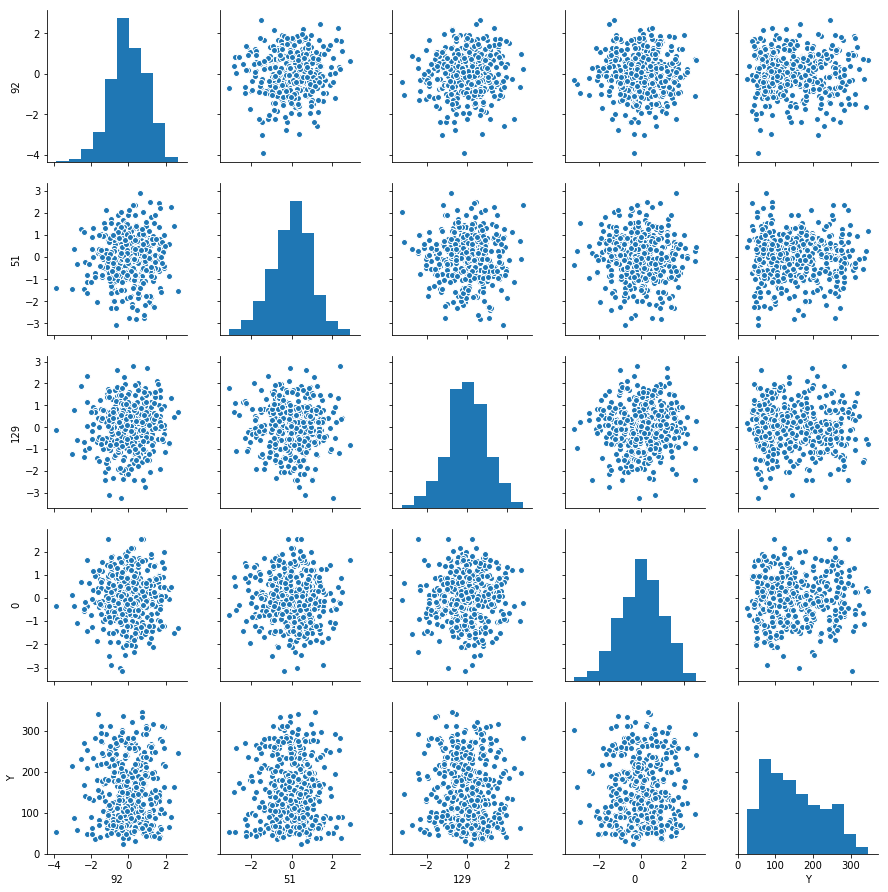

In [5]:
sample = X.T.sample(4).T
sample.loc[:,"Y"] = Y
sns.pairplot(sample)

Above is the *pairplot* generated, four variables were chosen (The numbers is the plot indicate which Xs are chosen) and the Y is added as a last column. 

We can see that there is no observable linear relevance in the graphs between the chosen exploratory varable and the output.  

### 3) Split the data

**IMPORTANT** Note that the "shuffle" option is added, if this part is runned again, the split result will change, which will also change the results in following questions.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
print("Size of the training set: " + str(X_train.shape[0]))
print("Size of the test set: " + str(X_test.shape[0]))

Size of the training set: 353
Size of the test set: 89


The size of each set is shown in the output above.

### 4) Covariance and eigenvalues

Text(0.5,0,'Variable')

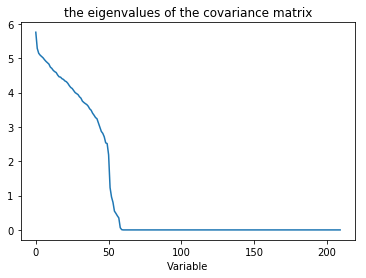

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
var_X_train = np.cov(X_train.T)
u, s, vh = np.linalg.svd(var_X_train)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s)
ax.set_title("the eigenvalues of the covariance matrix")
ax.set_xlabel("Variable")

We can see that, the eigenvalues become nearly zero after the first 60 ones, so the ones after are not relevent.

### 5) Applications of two methods and corresponding coefficients

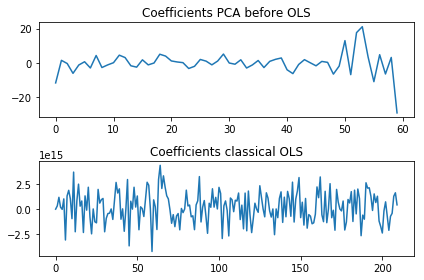

In [8]:
from sklearn.linear_model import LinearRegression
reg_ols = LinearRegression(fit_intercept = True).fit(X_train, Y_train)
reg_pca = LinearRegression(fit_intercept = True).fit(np.asmatrix(X_train) * np.asmatrix(u[:,0:60]), Y_train)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(reg_pca.coef_)
ax1.set_title("Coefficients PCA before OLS")
ax2 = fig.add_subplot(212)
ax2.plot(reg_ols.coef_)
ax2.set_title("Coefficients classical OLS")
plt.tight_layout()

### 6) Intercept comparison

In [9]:
print("Intercept of PCA before OLS: " + str(reg_pca.intercept_))
print("Intercept of classical OLS: " + str(reg_ols.intercept_))
print("Mean value of Y: " + str(np.mean(Y_train)))

Intercept of PCA before OLS: 150.85629968111024
Intercept of classical OLS: 150.7300814447592
Mean value of Y: 151.0113314447592


We can see that the intercepts obtained with the two methods are not equal, and the one of PCA before OLS is more proximite to the mean of Y. So we can say that after PCA, the reslut became more accurate.

In [10]:
from sklearn import preprocessing
X_pca = np.asmatrix(X_train) * np.asmatrix(u[:,0:60])
X_pca_scaled = preprocessing.scale(X_pca)
reg_pca_scaled = LinearRegression(fit_intercept = True).fit(X_pca_scaled, Y_train)
print("Intercept of PCA before OLS with centered and normalized variables: " + str(reg_pca_scaled.intercept_))

Intercept of PCA before OLS with centered and normalized variables: 151.0113314447592


Now we can see that after centering and normalizing the data, the intercept is equal to the mean of Y.

### 7) Residuals, density of residuals, risk

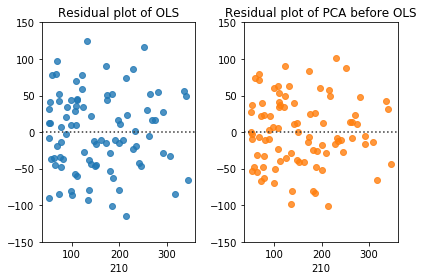

In [11]:
X_pca_test = np.asmatrix(X_test) * np.asmatrix(u[:,0:60])
Y_ols = reg_ols.predict(X_test)
Y_pca = reg_pca.predict(X_pca_test)

f, axes = plt.subplots(1, 2)
axes[0].set_ylim([-150, 150])
axes[1].set_ylim([-150, 150])
sns.residplot(Y_test, Y_ols, ax = axes[0]).set_title("Residual plot of OLS")
sns.residplot(Y_test, Y_pca, ax = axes[1]).set_title("Residual plot of PCA before OLS")
plt.tight_layout()

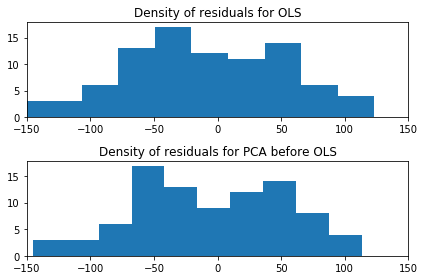

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_xlim(-150, 150)
ax1.set_title("Density of residuals for OLS")
ax1.hist(np.hstack(Y_ols - Y_test))
ax2 = fig.add_subplot(212)
ax2.set_xlim(-150, 150)
ax2.set_title("Density of residuals for PCA before OLS")
ax2.hist(np.hstack(Y_pca - Y_test))
plt.tight_layout()

From the two sets of graphs above, we can see that the residuals of PCA before OLS is more centered to 0, which in turns means PCA before OLS has better prediction performance.

In [13]:
print("The determination coefficient for OLS is: " + str(reg_ols.score(X_test, Y_test)))
print("The determination coefficient for PCA before OLS is: " + str(reg_pca.score(np.asmatrix(X_test) * np.asmatrix(u[:,0:60]), Y_test)))

The determination coefficient for OLS is: 0.3518601638142279
The determination coefficient for PCA before OLS is: 0.4505051449833205


We can see that the determination coefficient for PCA before OLS is more proximite to 1.

In [27]:
r_ols = np.sum((reg_ols.predict(X_test) - Y_test) ** 2)/Y_test.shape[0]
r_pca = np.sum((reg_pca.predict(np.asmatrix(X_test) * np.asmatrix(u[:,0:60])) - Y_test) ** 2)/Y_test.shape[0]
print("The prediction risk of OLS is: " + str(r_ols))
print("The prediction risk of PCA before OLS is: " + str(r_pca))

The prediction risk of OLS is: 4134.342866030502
The prediction risk of PCA before OLS is: 3505.1080136162504


Clearly, PCA before OLS has a smaller risk.

### 8) Forward variable selection

In [15]:
from scipy.stats import norm
from numpy.linalg import inv

p = X_train.shape[1]
n = X_train.shape[0]

test = np.zeros((p,p))
residuals = Y_train
p_val_mem = np.zeros(p)
p_val = np.zeros((p,p))

var_sel = []
var_remain = list(range(p))
in_test = []

reg = LinearRegression(fit_intercept = False)

for k in range(p):
    resids_mem = np.zeros((p, n))

    for i in var_remain:
        xtmp = X_train.iloc[:, [i]]
        reg.fit(xtmp, residuals)
        xx = np.sum(X_train.iloc[:, [i]] ** 2)
        resids_mem[i, :] = residuals - reg.predict(xtmp)
        sigma2_tmp = np.sum(resids_mem[i, :] ** 2) / xx
        test[k, i] = np.sqrt(n) * np.abs(reg.coef_) / np.sqrt(sigma2_tmp)
        p_val[k, i] = 2 * (1 - norm.cdf(test[k,i]))
            
    best_var = np.argmax(test[k, :])
    var_sel.append(best_var)
    residuals = resids_mem[best_var, :]
    p_val_mem[k] = p_val[k, best_var]
    var_remain = np.setdiff1d(var_remain, var_sel)

print("The order of the variable selection is: " + str(var_sel))

The order of the variable selection is: [123, 58, 8, 81, 168, 167, 133, 91, 175, 93, 202, 57, 0, 23, 96, 78, 60, 117, 63, 31, 110, 147, 65, 39, 79, 135, 48, 17, 118, 86, 61, 157, 141, 208, 151, 174, 34, 99, 25, 3, 71, 162, 36, 119, 82, 130, 204, 188, 169, 176, 129, 76, 13, 140, 92, 154, 67, 122, 15, 183, 73, 46, 105, 149, 177, 127, 20, 172, 132, 165, 56, 201, 112, 197, 75, 182, 90, 181, 124, 155, 94, 191, 178, 38, 101, 24, 207, 113, 148, 206, 74, 37, 66, 4, 160, 47, 84, 59, 189, 153, 196, 108, 77, 21, 41, 115, 97, 29, 64, 2, 95, 116, 138, 158, 32, 40, 126, 27, 192, 53, 136, 186, 173, 144, 102, 49, 205, 68, 199, 200, 103, 193, 198, 83, 69, 19, 190, 88, 51, 28, 89, 7, 35, 139, 106, 111, 30, 5, 52, 87, 120, 100, 107, 152, 156, 209, 195, 125, 180, 163, 161, 98, 55, 12, 70, 44, 164, 150, 128, 121, 146, 1, 80, 203, 159, 85, 109, 143, 11, 72, 6, 184, 16, 54, 166, 171, 42, 62, 33, 10, 26, 194, 170, 104, 14, 131, 45, 187, 134, 114, 43, 179, 18, 22, 185, 9, 142, 50, 145, 137]


### 9) Add stop criterion $p-value>1$

Text(0.5,0,'variables')

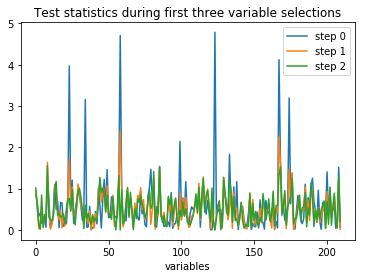

In [16]:

def f_label(i):
    return "step %s" % i

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(3): 
    label_tmp = f_label(i)
    ax.plot(np.arange(p),test[i,:], label = label_tmp)
ax.legend()
ax.set_title("Test statistics during first three variable selections")
ax.set_xlabel("variables")


Text(0.5,0,'steps')

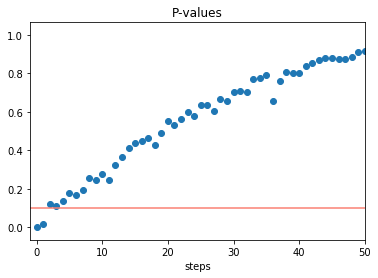

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.arange(p), p_val_mem)
ax.set_xlim(-1, 50) #set display limit to the first 50 steps
ax.hlines(0.1, -1 , 50, color = "#fa8072") #add the horizontal line
ax.set_title("P-values")
ax.set_xlabel("steps")

In [18]:
idx_sel = np.array(var_sel)[p_val_mem < .1] #Get the index of variables that satisfy the criterion.
print("The list of selected variables: " + str(idx_sel))

The list of selected variables: [123  58]


### 10) OLS on the selected variables

In [28]:
#idx_sel = idx_sel[1:]
X_sel = X_train.iloc[:, idx_sel]
reg_fvs = LinearRegression().fit(X_sel, Y_train)

r_fvs = sum((reg_fvs.predict(X_test.iloc[:, idx_sel]) - Y_test) ** 2)/Y_test.shape[0]


print("The prediction risk of OLS is: " + str(r_ols))
print("The prediction risk of PCA before OLS is: " + str(r_pca))
print("The prediction risk with forward variable selection is: " + str(r_fvs))

The prediction risk of OLS is: 4134.342866030502
The prediction risk of PCA before OLS is: 3505.1080136162504
The prediction risk with forward variable selection is: 3758.359948759692


We can see that with forward variable selection, we get a smaller risk than classical OLS, but the risk is larger than the one of PCA before OLS.

### 11) 4-folds splitting of training data

In [20]:
from sklearn.utils import shuffle

X_temp, Y_temp = shuffle(X_train, Y_train)
#X_temp = pd.DataFrame(preprocessing.scale(X_temp))
#Y_temp = pd.DataFrame(preprocessing.scale(Y_temp))

X_list = []
Y_list = []

#Calculate the size of each fold, separate the residue in the first (few) fold(s)
fold_sizes = np.full(4, X_train.shape[0] // 4, dtype=np.int)
fold_sizes[:X_train.shape[0] % 4] += 1

print("Number of observations in each fold: " + str(fold_sizes))

#Perform the splitting using the sizes obtained
current = 0
for i in range(0, 4):
    start, stop = current, current + fold_sizes[i]
    X_list.append(X_temp[start: stop])
    Y_list.append(Y_temp[start: stop])
    current = stop


Number of observations in each fold: [89 88 88 88]


### 12) The ridge regression method

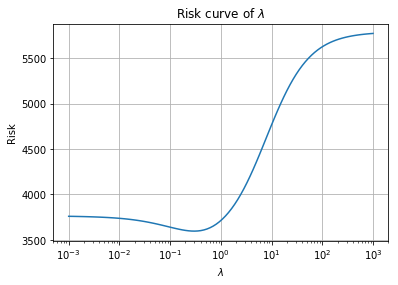

In [21]:
from numpy.linalg import norm

def risk_ridge(lmb):
    risk = 0
    for i in range (0, 4):
        #Form the training and test set in each iteration
        a = [0, 1, 2, 3]
        a.remove(i)
        temp_X_train = np.asmatrix(preprocessing.scale(pd.concat([X_list[a[0]], X_list[a[1]], X_list[a[2]]]), with_std=False))
        temp_Y_train = np.asmatrix(preprocessing.scale(pd.concat([Y_list[a[0]], Y_list[a[1]], Y_list[a[2]]]), with_std=False))
        temp_X_test = np.asmatrix(preprocessing.scale(np.ascontiguousarray(X_list[i]), with_std=False))
        temp_Y_test = np.asmatrix(preprocessing.scale(np.ascontiguousarray(Y_list[i]), with_std=False))
        
        #Calculate the theta_rdg
        I_p = np.matrix(np.eye(p))
        theta_rdg = inv(temp_X_train.T * temp_X_train + temp_X_train.shape[0]*lmb*I_p)*(temp_X_train.T)*(temp_Y_train.T)
        
        temp_Y_pre = temp_X_test * theta_rdg #The prediction with the theta
        risk += norm(temp_Y_test.T - temp_Y_pre) ** 2 / fold_sizes[i]#The risk in each fold
    return risk/4

vecfunc = np.vectorize(risk_ridge)
fig = plt.figure()
ax = fig.add_subplot(111)
lambdas = 10.0**np.linspace(-3, 3, 100)
ax.semilogx(lambdas, vecfunc(lambdas), basex=10)
ax.set_title("Risk curve of $\lambda$")
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel("Risk")
plt.grid(True)

From the graph above, we can see that when $\lambda$ is around $10^{-\frac{1}{2}}$, we get the minimum risk, so we take $\lambda_{optimal}=0.3$

In [22]:
print("The risk of the optimal parameter is: " + str(risk_ridge(0.3)))

The risk of the optimal parameter is: 3596.8177960827984


### 13) 14) TO fill (what is the $\lambda$ in P31 5.1? and the risk?)

In [29]:
from sklearn.linear_model import LassoCV
reg_lasso = LassoCV().fit(X_train, Y_train)
print("The parameter chosen is: " + str(reg_lasso.alpha_))
r_lasso = sum((reg_lasso.predict(X_test) - Y_test) ** 2)/Y_test.shape[0]
print("The corresponding risk for LASSO is: " + str(r_lasso))

The parameter chosen is: 5.210078357021425
The corresponding risk for LASSO is: 3547.103097916455


In [30]:
idx_lasso = np.nonzero(reg_lasso.coef_)[0]
print("The variables selected by LASSO are: " + str(idx_lasso))
print("Number of variables selected: " + str(len(idx_lasso)))

X_lsl = X_train.iloc[:, idx_lasso]
reg_lsl = LinearRegression().fit(X_lsl, Y_train)

r_lsl = sum((reg_lsl.predict(X_test.iloc[:, idx_lasso]) - Y_test) ** 2)/Y_test.shape[0]
print("The risk of Least-square LASSO is: " + str(r_lsl))

The variables selected by LASSO are: [  8  30  58  69  85 112 115 123 129 132 135 154 167 174 208]
Number of variables selected: 15
The risk of Least-square LASSO is: 3461.171149173141


### 15)

Here we use the variables of forward variable selection **X_sel** [123 167] (Note that if we divide the train set and test set differently i.e. rerun the code in Question 3), the selection result may change.) Here we guess the model is $y=a x_{123}^{2}+b x_{167}+c$, a, b, c are constants.

In [31]:
from scipy.optimize import leastsq

def model(p,x): #build the gussed model
    a, b, c = p
    u = x[:,0]
    v = x[:,1]
    return (a*u**2 + b*v + c)

def resid_func(p, y, x):
    a,b,c = p
    err = y - model(p,x)
    return err.ravel()

p0 = np.array([-2.0,-3.0,-4.0]) #initial guess of a, b, c

#use OLS to fit this model
p = leastsq(resid_func, p0, args = (np.array(Y_train).reshape((-1,1)), np.array(X_sel)))[0]

#Calculate the risk
nl_risks = resid_func(p, np.array(Y_test).reshape((-1,1)), np.array(X_test.iloc[:, idx_sel]))
risk_nl = sum(nl_risks**2)/Y_test.shape[0]
print("The risk of this non-linear model is: " + str(risk_nl))

The risk of this non-linear model is: 570475.7479914695


The risk for this non-linear model is way larger than the linear ones, this model is not a good one. So I think that the covariates have a relatively linear relation with the disease progressing, which is also intuitive.